<a href="https://colab.research.google.com/github/josewborba/portfolio/blob/main/Graph_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Notebook is the material of study that resulted from the Seaborn Courses. It will be usefull for further consulting and for best graph choosing. It will keep being updated with new graphs that I think might be interesting to reproduce.

Links that might help:

Choose the Right Chart Type for Your Data
https://help.tableau.com/current/pro/desktop/en-us/what_chart_example.htm

Seaborn Example Gallery
http://seaborn.pydata.org/examples/index.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
school = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/schoolimprovement2010grants.csv')
bicicle = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/bike_share.csv')
college = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/college_datav3.csv')
guests = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/daily_show_guests_cleaned.csv')
insurance = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/insurance_premiums.csv')
df = pd.read_csv('/content/drive/MyDrive/DataCamp/Intermediate Seaborn/datasets/df.csv')

Framework to decide which graph to choose

**Univariate Distribution Analysis:**

`distplot()` is the best place to start for this analysis
`rugplot()` and `kdeplot()` can be usefull alternatives

**Regression Analysis**
`lmplot()` performs regression analysis and support facetting

**Categorical Plot**
`boxplot()`  and/or `violionplot()` to examine the distribution of the variables

**THEN**

follow up with the statistical estimation plots like `barplot()`, `pointplot()` and `count(plot)`.
To facet the data use `factorplot()`

After you've done preliminar examinations of the data. Like regressions and distributions the `pairplot()` and `jointplot()` will provide deeper insights.

Hope it's usefull.
Have fun!

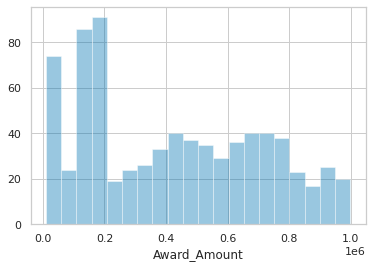

In [ ]:
# Create a distplot
sns.distplot(school['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

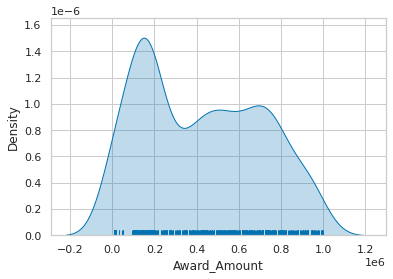

In [ ]:
# Create a distplot of the Award Amount
sns.distplot(school['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

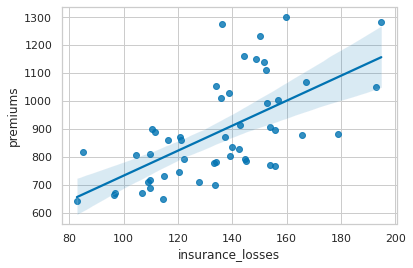

In [ ]:
# Create a regression plot of premiums vs. insurance_losses
sns.regplot(x='insurance_losses', y='premiums', data=insurance)

# Display the plot
plt.show()

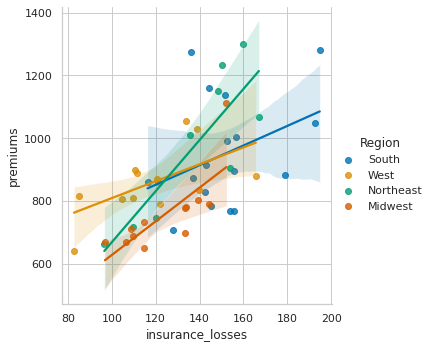

In [ ]:
 #Create a regression plot using hue
sns.lmplot(data=insurance,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

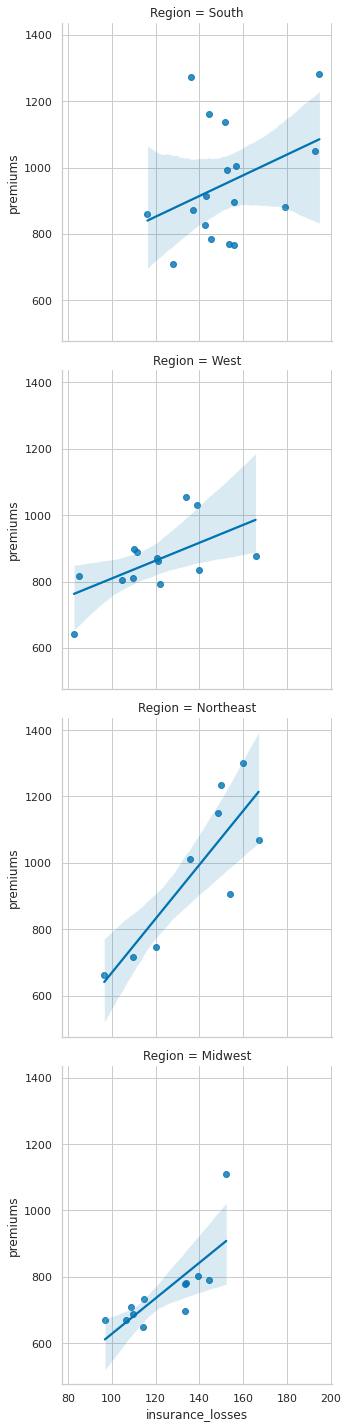

In [ ]:
# Create a regression plot with multiple rows
sns.lmplot(data=insurance,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()

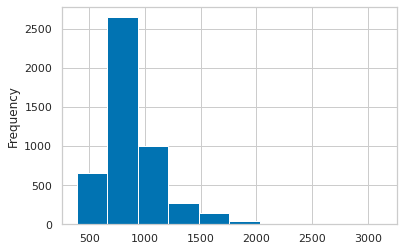

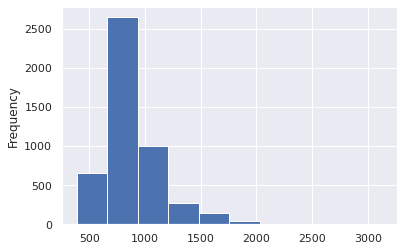

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the pandas histogram
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

# Set the default seaborn style
sns.set()

# Plot the pandas histogram again
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

Styles

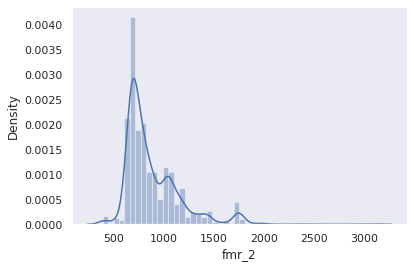

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_style('dark')
sns.distplot(df['fmr_2'])
plt.show()
plt.clf()

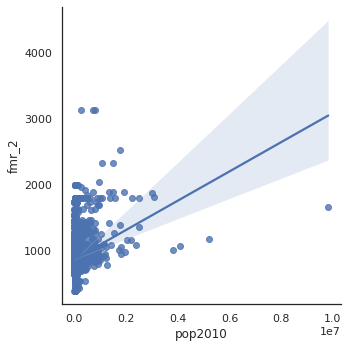

<Figure size 432x288 with 0 Axes>

In [ ]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='pop2010',
           y='fmr_2')

# Remove the spines
#sns.despine(left=True, right=True)

# Show the plot and clear the figure
plt.show()
plt.clf()

Colors

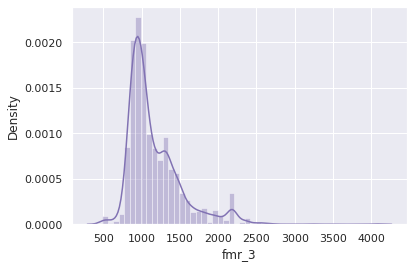

In [ ]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.distplot(df['fmr_3'], color='m')

# Show the plot
plt.show()

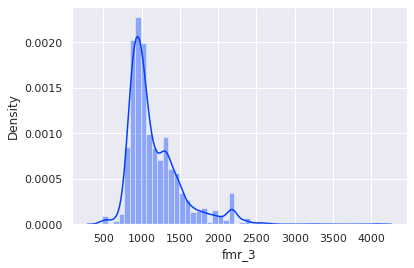

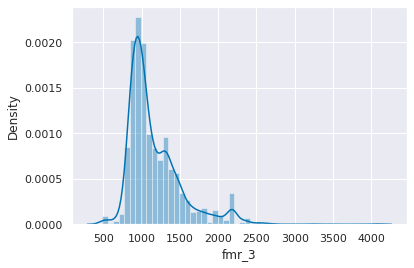

<Figure size 432x288 with 0 Axes>

In [ ]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(df['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

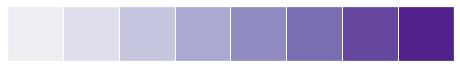

In [ ]:
# Create the Purples palette
sns.palplot(sns.color_palette("Purples", 8))
plt.show()

Customizing with matplotlib (labels, axis, bins, titles)


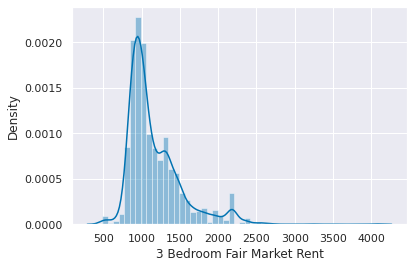

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()

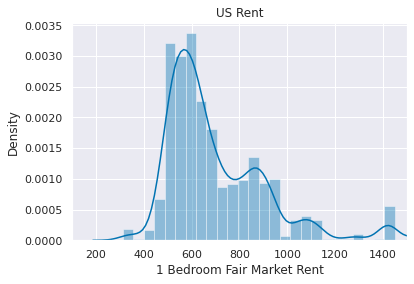

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

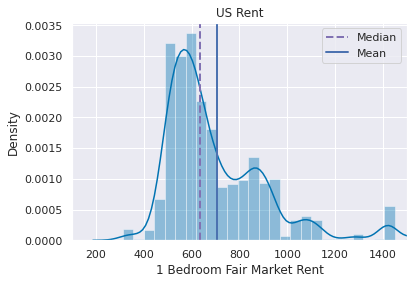

In [ ]:
import numpy as np

mean = np.mean(df['fmr_1'])
median = np.median(df['fmr_1'])

# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)


# Show the legend and plot the data
ax.legend()
plt.show()

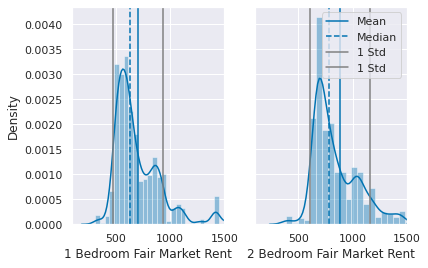

In [ ]:
import numpy as np
ax0median = np.median(df['fmr_1'])
ax0mean = np.mean(df['fmr_1'])
ax0std_max = np.std(df['fmr_1'])+ax0mean
ax0std_min = ax0mean-np.std(df['fmr_1'])

ax1median = np.median(df['fmr_2'])
ax1mean = np.mean(df['fmr_2'])
ax1std_max = np.std(df['fmr_2'])+ax1mean
ax1std_min = ax1mean-np.std(df['fmr_2'])
ax1std_min
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(df['fmr_1'], ax=ax0)
ax0.axvline(x=ax0mean, label='Mean', linestyle='-')
ax0.axvline(x=ax0median, label='Median', linestyle='--')
ax0.axvline(x=ax0std_max, label='1 Std', color='gray', linestyle='-')
ax0.axvline(x=ax0std_min, label='1 Std', color='gray', linestyle='-')
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(df['fmr_2'], ax=ax1)
ax1.axvline(x=ax1mean, label='Mean', linestyle='-')
ax1.axvline(x=ax1median, label='Median', linestyle='--')
ax1.axvline(x=ax1std_max, label='1 Std', color='gray', linestyle='-')
ax1.axvline(x=ax1std_min, label='1 Std', color='gray', linestyle='-')
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

plt.legend()
# Display the plot
plt.show()

Categorical Plots

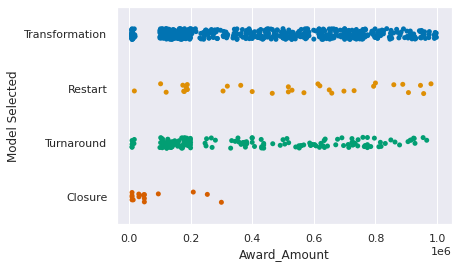

In [ ]:
# Create the stripplot
sns.stripplot(data=school,
         x='Award_Amount',
         y='Model Selected',
         jitter=True)

plt.show()

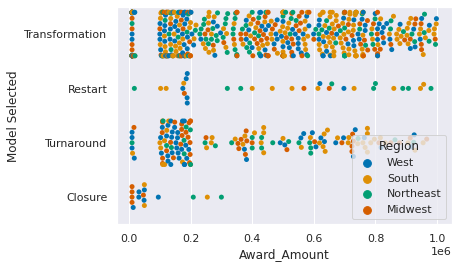

In [ ]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=school,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')

plt.show()

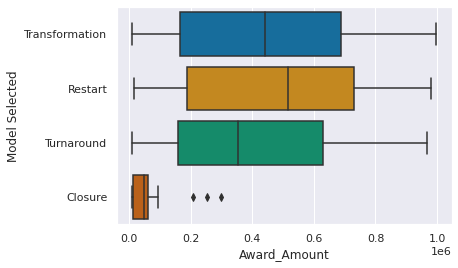

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a boxplot
sns.boxplot(data=school,
         x='Award_Amount',
         y='Model Selected')

plt.show()
plt.clf()

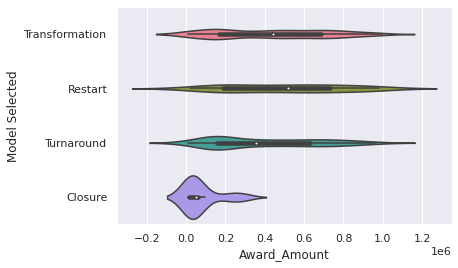

In [ ]:
# Create a violinplot with the husl palette
sns.violinplot(data=school,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')

plt.show()

In [ ]:
# Create a lvplot with the Paired palette and the Region column as the hue
#It's not available at Google Colab Seaborn Version
#sns.lvplot(data=school,
#         x='Award_Amount',
#         y='Model Selected',
#         palette='Paired',
#         hue='Region')

#plt.show()
#plt.clf()

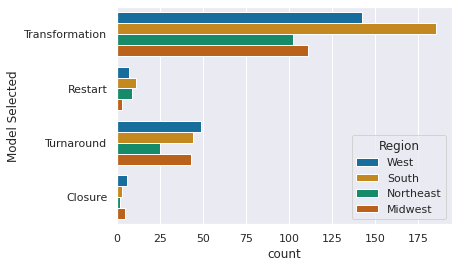

<Figure size 432x288 with 0 Axes>

In [ ]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=school,
         y="Model Selected",
         hue="Region")

plt.show()
plt.clf()

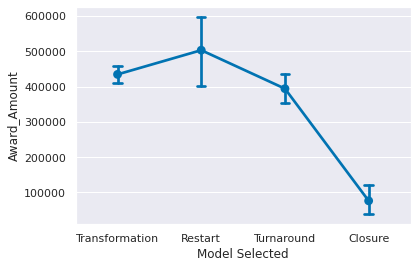

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a pointplot and include the capsize in order to show caps on the error bars
sns.pointplot(data=school,
         y='Award_Amount',
         x='Model Selected',
         capsize=.1)

plt.show()
plt.clf()

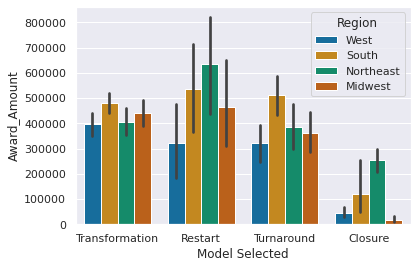

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a barplot with each Region shown as a different color
sns.barplot(data=school,
         y='Award_Amount',
         x='Model Selected',
         hue='Region')

plt.show()
plt.clf()

Regression Plots

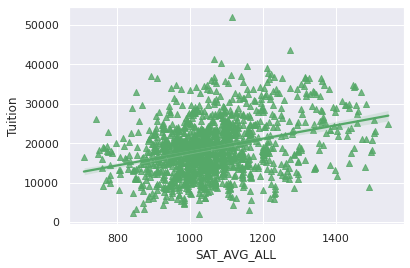

<Figure size 432x288 with 0 Axes>

In [ ]:
# Display a regression plot for Tuition
sns.regplot(data=college,
         y='Tuition',
         x="SAT_AVG_ALL",
         marker='^',
         color='g')

plt.show()
plt.clf()

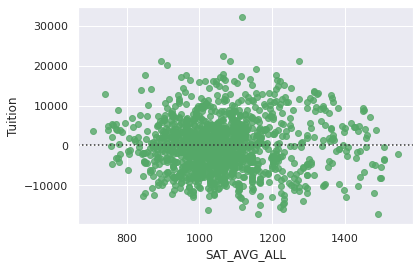

<Figure size 432x288 with 0 Axes>

In [ ]:
# Display the residual plot
sns.residplot(data=college,
          y='Tuition',
          x="SAT_AVG_ALL",
          color='g')

plt.show()
plt.clf()

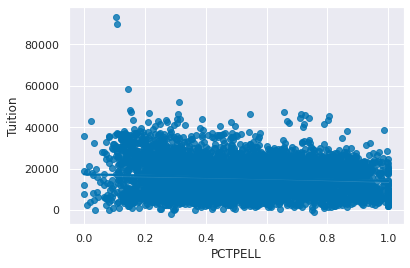

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=college,
            y='Tuition',
            x="PCTPELL")

plt.show()
plt.clf()

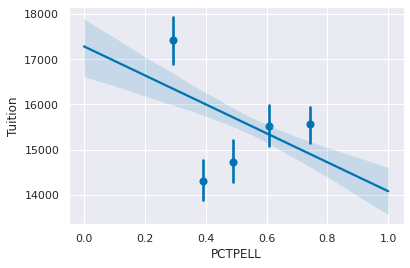

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=college,
            y='Tuition',
            x="PCTPELL",
            x_bins=5)

plt.show()
plt.clf()

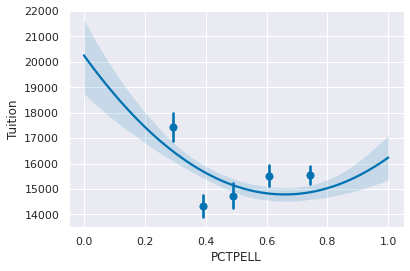

<Figure size 432x288 with 0 Axes>

In [ ]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=college,
            y='Tuition',
            x="PCTPELL",
            x_bins=5,
            order=2)

plt.show()
plt.clf()

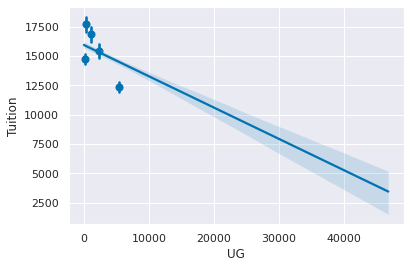

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=college,
            y='Tuition',
            x="UG",
            x_bins=5)

plt.show()
plt.clf()

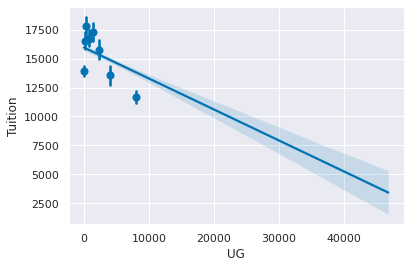

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=college,
         y='Tuition',
         x="UG",
         x_bins=8)

plt.show()
plt.clf()

Heatmap

In [ ]:
pd_crosstab = pd.crosstab(guests["Group"], guests["YEAR"])
print(pd_crosstab)

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

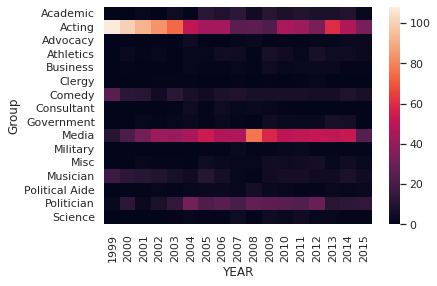

In [ ]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(guests["Group"], guests["YEAR"])

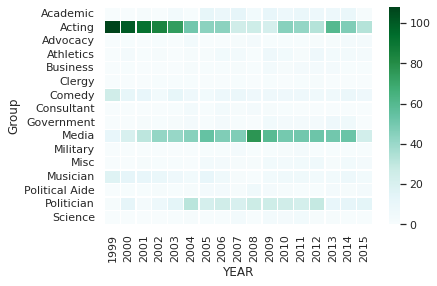

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=True, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

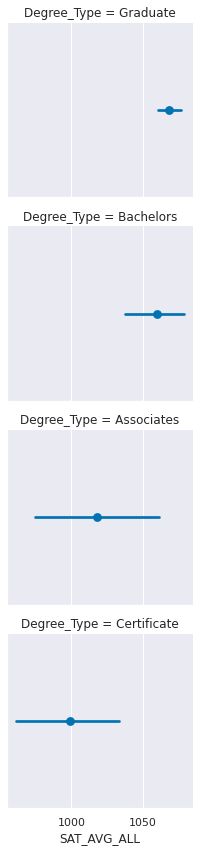

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(college, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

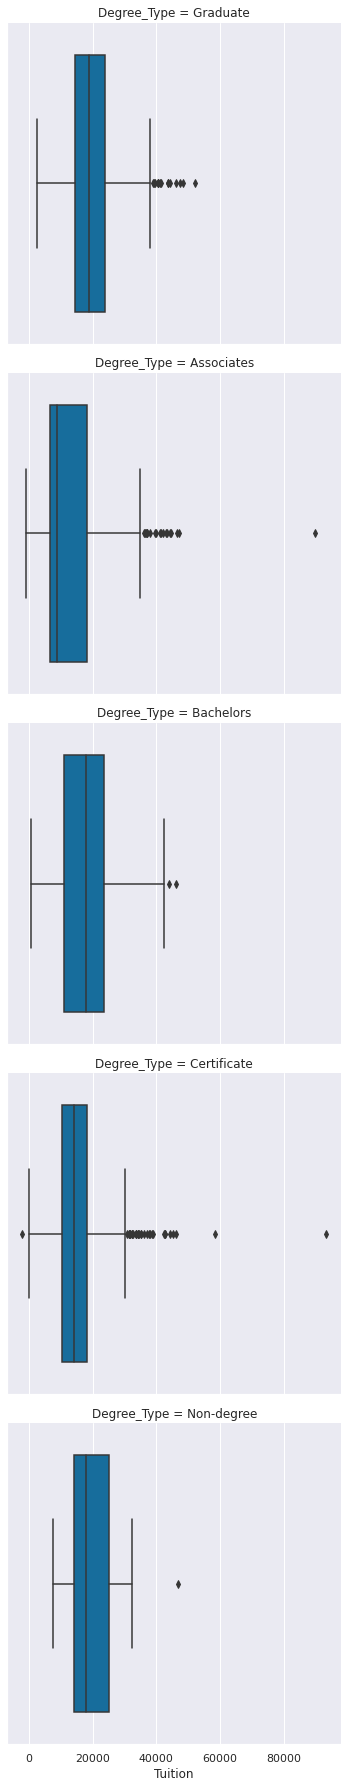

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=college,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

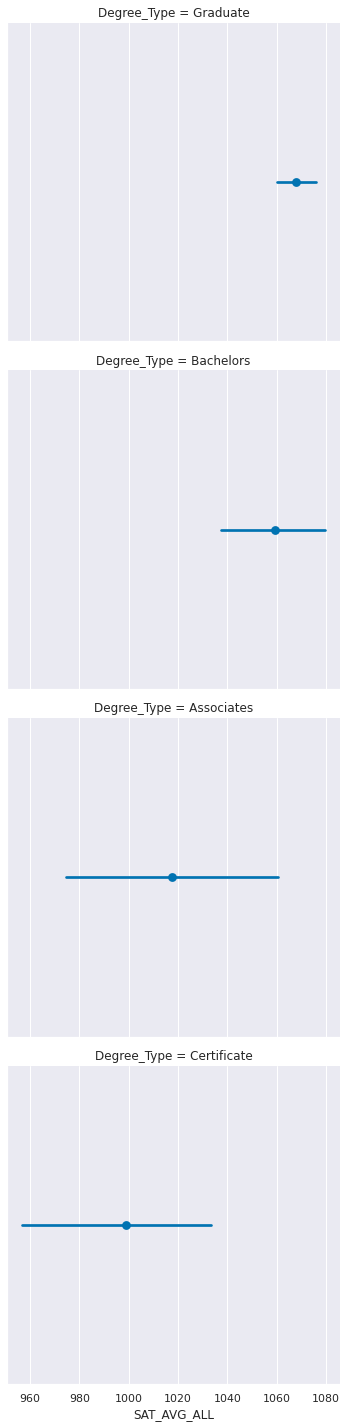

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=college,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

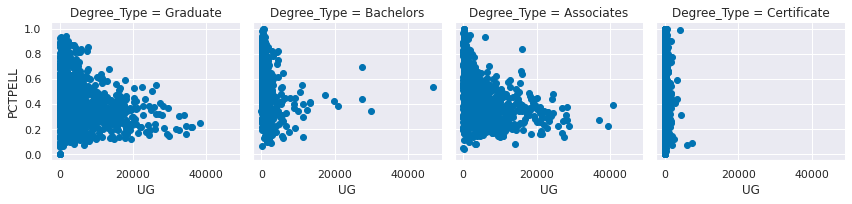

<Figure size 432x288 with 0 Axes>

In [ ]:
degree_ord = ['Graduate', 'Bachelors', 'Associates', 'Certificate']
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(college, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

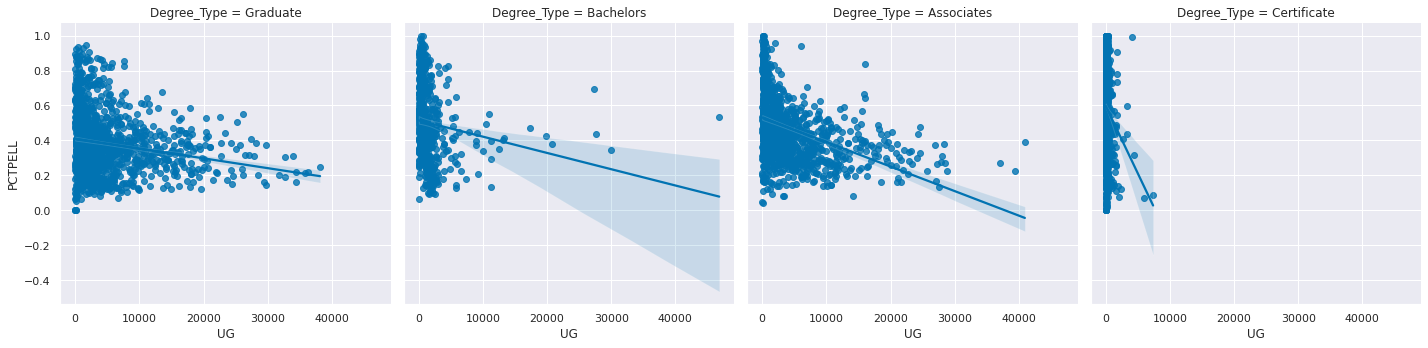

<Figure size 432x288 with 0 Axes>

In [ ]:
degree_ord = ['Graduate', 'Bachelors', 'Associates', 'Certificate']
# Re-create the previous plot as an lmplot
sns.lmplot(data=college,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

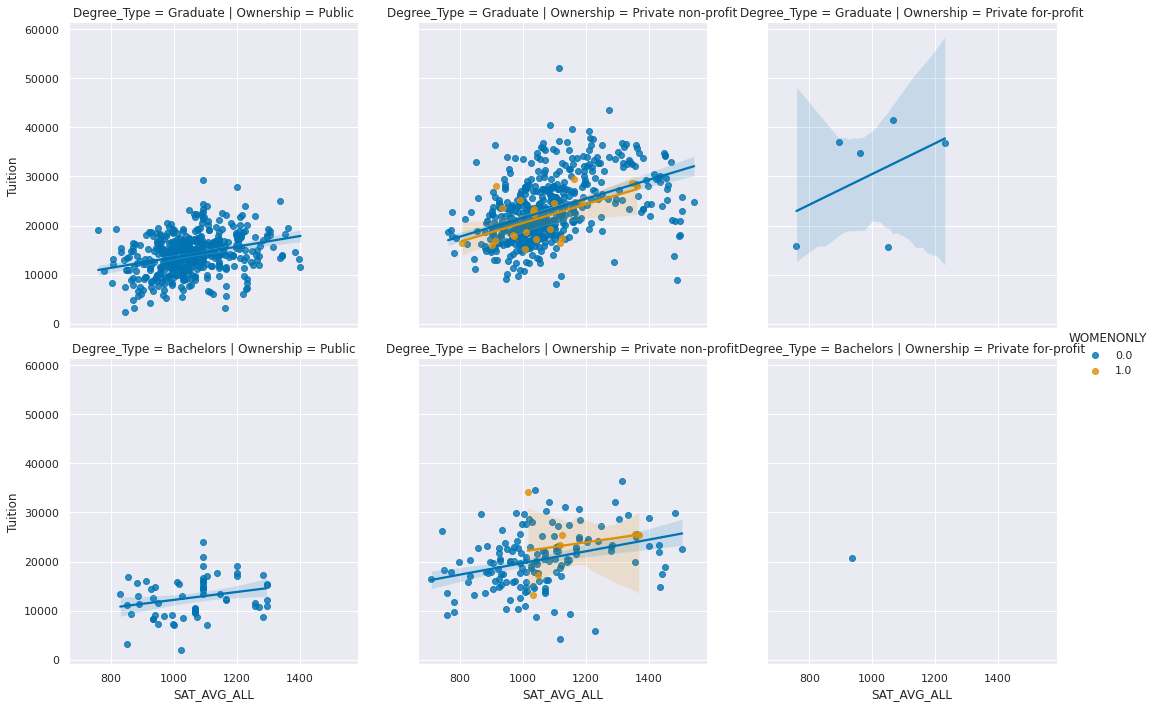

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=college,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY')

plt.show()
plt.clf()

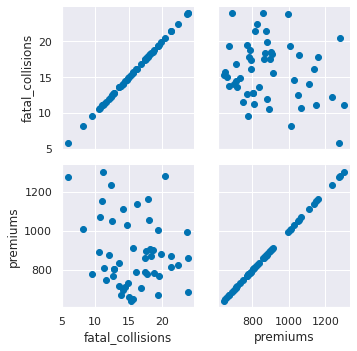

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(insurance, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

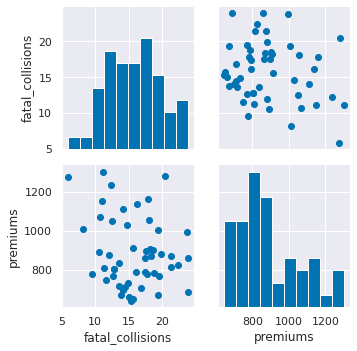

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(insurance, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

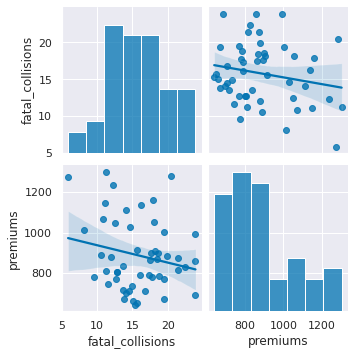

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=insurance,
        vars=["fatal_collisions", "premiums"],
        kind='reg') #might swtich to scatter

plt.show()
plt.clf()

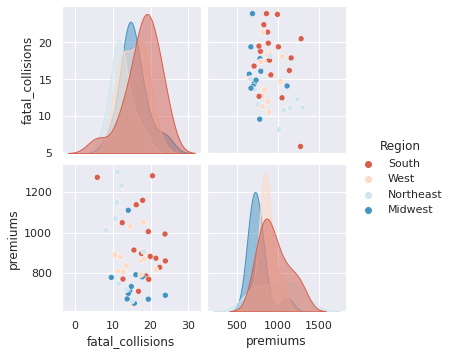

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=insurance,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

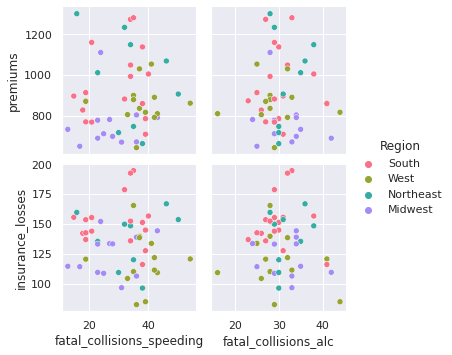

<Figure size 432x288 with 0 Axes>

In [ ]:
# Build a pairplot with different x and y variables
sns.pairplot(data=insurance,
             x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter',
             hue='Region',
             palette='husl')

plt.show()
plt.clf()

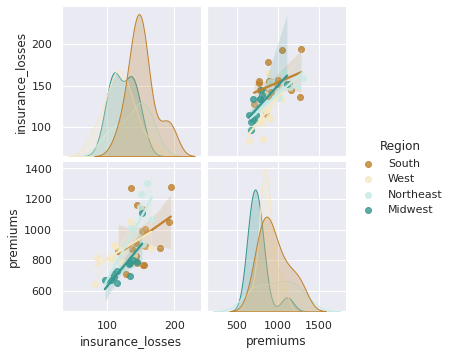

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=insurance,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

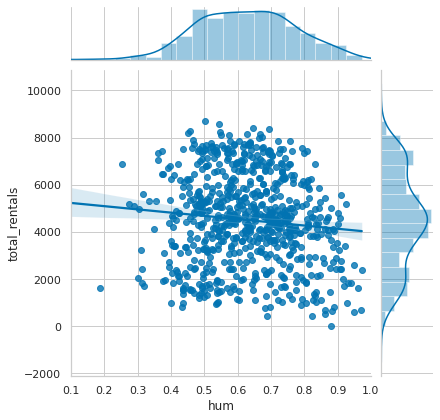

<Figure size 432x288 with 0 Axes>

In [ ]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=bicicle,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

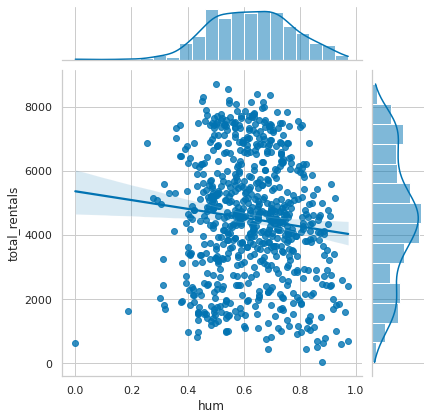

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=bicicle)

plt.show()
plt.clf()

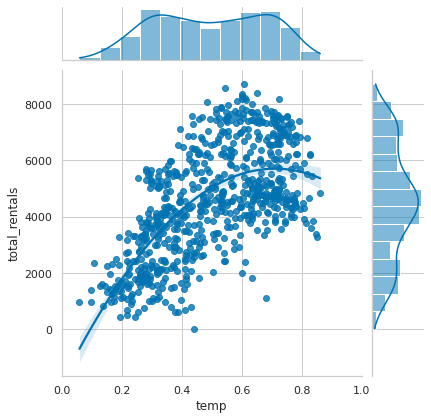

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=bicicle,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

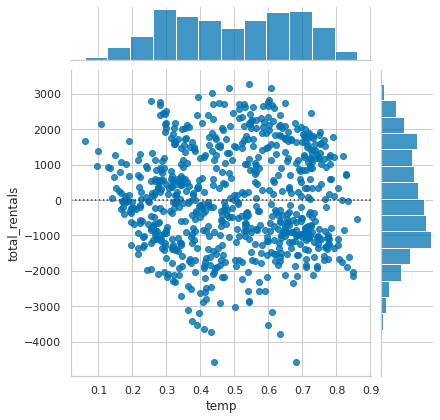

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=bicicle,
        order=2)

plt.show()
plt.clf()

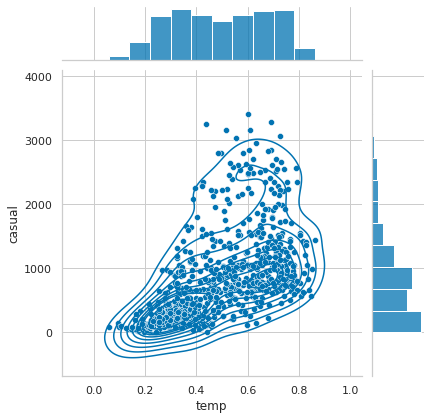

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=bicicle,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

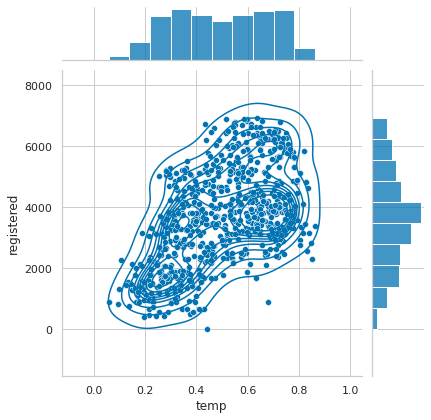

<Figure size 432x288 with 0 Axes>

In [ ]:
# Replicate the previous plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=bicicle,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()